# IMPORTING NECCESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\tamil\Desktop\SEM 9\LEAN_PAPER\lean-data.csv")

In [4]:
df.head()

,WELDING SPEED(m/min),WIRE FEED SPEED(m/min),OVERLAP RATIO(%),SURFACE ROUGHNESS(mm)
0,4.0,5.0,0.10,0.601
1,4.0,7.0,0.25,0.312
2,5.5,8.3,0.25,0.311
3,4.0,8.3,0.20,0.852
4,7.0,5.0,0.20,0.240


In [8]:
X = df.drop('SURFACE ROUGHNESS(mm)',axis='columns')
y = df[['SURFACE ROUGHNESS(mm)']]

# DESCRIPTIVE STATICSTICS OF DATA

In [9]:
df.describe()

,WELDING SPEED(m/min),WIRE FEED SPEED(m/min),OVERLAP RATIO(%),SURFACE ROUGHNESS(mm)
count,27.000000,27.000000,27.000000,27.000000
mean,5.500000,6.766667,0.183333,0.443481
std,1.248075,1.383140,0.063549,0.209135
min,4.000000,5.000000,0.100000,0.185000
25%,4.000000,5.000000,0.100000,0.281000
50%,5.500000,7.000000,0.200000,0.382000
75%,7.000000,8.300000,0.250000,0.607000
max,7.000000,8.300000,0.250000,0.852000


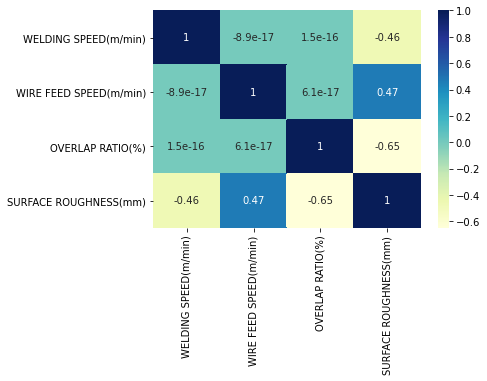

In [10]:
#DISPLAYING CORRELATION PLOT
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
model.score(X_test,y_test)

0.7513872792259154

In [5]:
from sklearn import tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

In [32]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)
y_p = rf.predict(X_test)

<ipython-input-32-52f05d4dbf77>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


In [12]:
feat = df.columns[[0,1,2]]

imp = rf.feature_importances_
ind = np.argsort(imp)

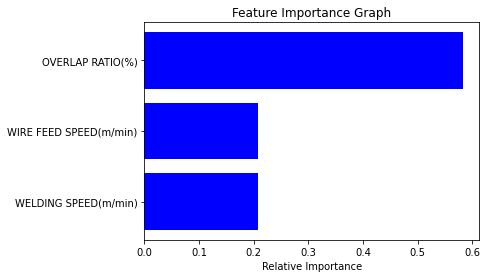

In [13]:
plt.title('Feature Importance Graph')
plt.barh(range(len(ind)), imp[ind], color='b', align='center')
plt.yticks(range(len(ind)), [feat[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
y_pred = model.predict(X_test)

In [20]:
y_test

,SURFACE ROUGHNESS(mm)
8,0.406
13,0.318
9,0.416
21,0.834
0,0.601
11,0.612
16,0.382
17,0.419
12,0.611


In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error


def R2_score_(a,b):
    return r2_score(a,b)

def mse_(a,b):
    return mean_squared_error(a,b)

def rmse_(a,b):
    return np.sqrt(mse_(a,b))

def mae_(a,b):
    return MAE(a,b)

In [23]:
print("COEFFICIENT OF DETERMINATION  : " , R2_score_(y_test,y_pred))
print("MEAN SQUARE ERROR             : " , mse_(y_test,y_pred))
print("ROOT MEAN SQUARE ERROR        : " , rmse_(y_test,y_pred))
print("MEAN ABSOLUTE ERROR           : " , mae_(y_test,y_pred))

COEFFICIENT OF DETERMINATION  :  0.7513872792259154
MEAN SQUARE ERROR             :  0.005940020866548277
ROOT MEAN SQUARE ERROR        :  0.07707153084342024
MEAN ABSOLUTE ERROR           :  0.06205639415660294


In [33]:
print("COEFFICIENT OF DETERMINATION  : " , R2_score_(y_test,y_p))
print("MEAN SQUARE ERROR             : " , mse_(y_test,y_p))
print("ROOT MEAN SQUARE ERROR        : " , rmse_(y_test,y_p))
print("MEAN ABSOLUTE ERROR           : " , mae_(y_test,y_p))

COEFFICIENT OF DETERMINATION  :  0.6969152096877692
MEAN SQUARE ERROR             :  0.007241503866666691
ROOT MEAN SQUARE ERROR        :  0.08509702619167542
MEAN ABSOLUTE ERROR           :  0.06344666666666673
